In [1]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt

In [2]:
ki = pd.read_csv('wasting transition rates.csv')
ki.head()

,study_id,study_site,country_iso2,age_group,time,non_wasted_time,mild_time,moderate_time,severe_time,non_to_mild,...,i_mild_severe,i_mod_severe,i_non_mod,i_non_severe,r_mild_non,r_mod_mild,r_severe_mod,r_moderate_non,r_severe_non,r_severe_mild
0,AKU_EE,AKU-EE PK,PK,<27 days,5241,3583,994,463,201,11,...,0.000000,0.000000,0.000279,0.000000,0.015091,0.015119,0.004975,0.006479,0.009950,0.000000
1,AKU_EE,AKU-EE PK,PK,1 to 5 months,56444,40810,10099,4149,1386,169,...,0.000495,0.004338,0.000588,0.000098,0.012476,0.009882,0.011544,0.005785,0.005772,0.002165
2,AKU_EE,AKU-EE PK,PK,6 to 12 months,69187,41677,17913,7142,2455,129,...,0.000502,0.002380,0.000072,0.000000,0.007816,0.012181,0.009776,0.000420,0.000407,0.002444
3,AKU_EE,AKU-EE PK,PK,1 to 4 years,125874,61944,41467,17782,4681,224,...,0.000121,0.003205,0.000129,0.000000,0.004100,0.007536,0.011750,0.000337,0.000000,0.000427
4,UCDNUT_BFA_ZN,UCDNut_Zn BF,BF,1 to 4 years,148411,75718,50105,18881,3707,72,...,0.000140,0.000583,0.000119,0.000000,0.001357,0.002436,0.004046,0.000265,0.000270,0.001619


In [3]:
ki.columns 

Index(['study_id', 'study_site', 'country_iso2', 'age_group', 'time',
       'non_wasted_time', 'mild_time', 'moderate_time', 'severe_time',
       'non_to_mild', 'mild_to_moderate', 'moderate_to_severe',
       'non_to_moderate', 'non_to_severe', 'mild_to_severe', 'mild_to_non',
       'moderate_to_mild', 'severe_to_moderate', 'severe_to_mild',
       'moderate_to_non', 'severe_to_non', 'i_non_mild', 'i_mild_mod',
       'i_mild_severe', 'i_mod_severe', 'i_non_mod', 'i_non_severe',
       'r_mild_non', 'r_mod_mild', 'r_severe_mod', 'r_moderate_non',
       'r_severe_non', 'r_severe_mild'],
      dtype='object')

In [4]:
ki['severe_to_all_less_severe'] = ki.severe_to_non + ki.severe_to_mild + ki.severe_to_non
ki['moderate_to_all_less_severe'] = ki.moderate_to_mild + ki.moderate_to_non
ki['non_to_all_more_severe'] = ki.non_to_mild + ki.non_to_moderate + ki.non_to_severe
ki['mild_to_all_more_severe'] = ki.mild_to_moderate + ki.mild_to_severe
ki.head()

,study_id,study_site,country_iso2,age_group,time,non_wasted_time,mild_time,moderate_time,severe_time,non_to_mild,...,r_mild_non,r_mod_mild,r_severe_mod,r_moderate_non,r_severe_non,r_severe_mild,severe_to_all_less_severe,moderate_to_all_less_severe,non_to_all_more_severe,mild_to_all_more_severe
0,AKU_EE,AKU-EE PK,PK,<27 days,5241,3583,994,463,201,11,...,0.015091,0.015119,0.004975,0.006479,0.009950,0.000000,4,10,12,5
1,AKU_EE,AKU-EE PK,PK,1 to 5 months,56444,40810,10099,4149,1386,169,...,0.012476,0.009882,0.011544,0.005785,0.005772,0.002165,19,65,197,60
2,AKU_EE,AKU-EE PK,PK,6 to 12 months,69187,41677,17913,7142,2455,129,...,0.007816,0.012181,0.009776,0.000420,0.000407,0.002444,8,90,132,77
3,AKU_EE,AKU-EE PK,PK,1 to 4 years,125874,61944,41467,17782,4681,224,...,0.004100,0.007536,0.011750,0.000337,0.000000,0.000427,2,140,232,165
4,UCDNUT_BFA_ZN,UCDNut_Zn BF,BF,1 to 4 years,148411,75718,50105,18881,3707,72,...,0.001357,0.002436,0.004046,0.000265,0.000270,0.001619,8,51,81,55


In [5]:
ki['r_severe_all'] = ki.severe_to_all_less_severe / ki.severe_time
ki['r_moderate_all'] = ki.moderate_to_all_less_severe / ki.moderate_time
ki['i_none_all'] = ki.non_to_all_more_severe / ki.non_wasted_time
ki['i_mild_all'] = ki.mild_to_all_more_severe / ki.mild_time
ki.head()

,study_id,study_site,country_iso2,age_group,time,non_wasted_time,mild_time,moderate_time,severe_time,non_to_mild,...,r_severe_non,r_severe_mild,severe_to_all_less_severe,moderate_to_all_less_severe,non_to_all_more_severe,mild_to_all_more_severe,r_severe_all,r_moderate_all,i_none_all,i_mild_all
0,AKU_EE,AKU-EE PK,PK,<27 days,5241,3583,994,463,201,11,...,0.009950,0.000000,4,10,12,5,0.019900,0.021598,0.003349,0.005030
1,AKU_EE,AKU-EE PK,PK,1 to 5 months,56444,40810,10099,4149,1386,169,...,0.005772,0.002165,19,65,197,60,0.013709,0.015666,0.004827,0.005941
2,AKU_EE,AKU-EE PK,PK,6 to 12 months,69187,41677,17913,7142,2455,129,...,0.000407,0.002444,8,90,132,77,0.003259,0.012602,0.003167,0.004299
3,AKU_EE,AKU-EE PK,PK,1 to 4 years,125874,61944,41467,17782,4681,224,...,0.000000,0.000427,2,140,232,165,0.000427,0.007873,0.003745,0.003979
4,UCDNUT_BFA_ZN,UCDNut_Zn BF,BF,1 to 4 years,148411,75718,50105,18881,3707,72,...,0.000270,0.001619,8,51,81,55,0.002158,0.002701,0.001070,0.001098


In [6]:
ki_summary = ki.groupby(['age_group']).describe(percentiles=[0.025,0.975]).reset_index()
ki_summary['age_start'] = [1, 1/12, 5, 0.5, 1/12]
ki_summary = ki_summary.sort_values(by='age_start')
ki_summary

age_group  time                                                   \
                  count           mean            std     min       2.5%   
1   1 to 5 months  24.0   78070.333333   90128.516004     0.0    685.975   
4        <27 days  20.0    3763.400000    4312.302699     0.0      5.225   
3  6 to 12 months  26.0  121638.846154  150295.761941  8715.0  10173.125   
0    1 to 4 years  26.0  176800.730769  166967.964814   541.0  12791.625   
2        5+ years   2.0     902.000000    1193.596247    58.0    100.200   

                                  non_wasted_time  ... i_none_all i_mild_all  \
        50%       97.5%       max           count  ...        max      count   
1   43047.0  319853.800  408252.0            24.0  ...   0.005036       23.0   
4    3066.0   15013.925   15535.0            20.0  ...   0.003571       18.0   
3   47304.0  478136.125  575713.0            26.0  ...   0.005762       26.0   
0  128936.5  621897.250  806926.0            26.0  ...   0.007576       26.0   
2     902.0    1703.800    1746.0             2.0  ...   0.000000        1.0   

                                                                   age_start  
       mean       std  min      2.5%       50%     97.5%       max            
1  0.002034  0.001908  0.0  0.000000  0.001547  0.005919  0.005941  0.083333  
4  0.001321  0.004508  0.0  0.000000  0.000000  0.012919  0.018750  0.083333  
3  0.002446  0.001401  0.0  0.000000  0.002442  0.004437  0.004656  0.500000  
0  0.002058  0.001325  0.0  0.000063  0.001982  0.004669  0.005820  1.000000  
2  0.000000       NaN  0.0  0.000000  0.000000  0.000000  0.000000  5.000000  

[5 rows x 298 columns]

In [8]:
ki.columns

Index(['study_id', 'study_site', 'country_iso2', 'age_group', 'time',
       'non_wasted_time', 'mild_time', 'moderate_time', 'severe_time',
       'non_to_mild', 'mild_to_moderate', 'moderate_to_severe',
       'non_to_moderate', 'non_to_severe', 'mild_to_severe', 'mild_to_non',
       'moderate_to_mild', 'severe_to_moderate', 'severe_to_mild',
       'moderate_to_non', 'severe_to_non', 'i_non_mild', 'i_mild_mod',
       'i_mild_severe', 'i_mod_severe', 'i_non_mod', 'i_non_severe',
       'r_mild_non', 'r_mod_mild', 'r_severe_mod', 'r_moderate_non',
       'r_severe_non', 'r_severe_mild', 'severe_to_all_less_severe',
       'moderate_to_all_less_severe', 'non_to_all_more_severe',
       'mild_to_all_more_severe', 'r_severe_all', 'r_moderate_all',
       'i_none_all', 'i_mild_all'],
      dtype='object')

In [17]:
ki_summary.loc[ki_summary.age_group.isin(['6 to 12 months','1 to 4 years'])].set_index(['age_group'])[['r_mild_non']]

r_mild_non                                               \
                    count      mean       std  min      2.5%       50%   
age_group                                                                
6 to 12 months       26.0  0.006460  0.004668  0.0  0.000000  0.006081   
1 to 4 years         26.0  0.005169  0.004782  0.0  0.000058  0.003939   

                                    
                   97.5%       max  
age_group                           
6 to 12 months  0.016669  0.018896  
1 to 4 years    0.016826  0.017627

In [7]:
output_dir = '/ihme/costeffectiveness/results/vivarium_ciff_sam/v5.3.3_sam_k_sensitivity/ciff_sam/2022_02_08_09_51_56/count_data/'
wasting_transitions = pd.read_csv(output_dir + 'wasting_transition_count.csv').drop(columns='Unnamed: 0')
wasting_transitions.head()

,sex,year,measure,input_draw,scenario,sam_k,value,x_factor,sq_lns,mam_treatment,sam_treatment,age
0,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,alternative,0.0,cat2,covered,covered,covered,early_neonatal
1,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,alternative,0.0,cat1,covered,covered,covered,early_neonatal
2,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,alternative,0.0,cat2,covered,uncovered,covered,early_neonatal
3,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,alternative,0.0,cat1,covered,uncovered,covered,early_neonatal
4,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,alternative,0.0,cat2,covered,covered,uncovered,early_neonatal


In [8]:
wasting_transitions = (wasting_transitions
                       .loc[wasting_transitions.scenario=='baseline']
                       .groupby(['input_draw','sam_k','age','measure']).sum()
                       .drop(columns='year')
                       .reset_index())
wasting_person_time = pd.read_csv(output_dir + 'wasting_state_person_time.csv').drop(columns='Unnamed: 0')

In [9]:
ages = ['6-11_months','12_to_23_months','2_to_4']

In [10]:
sam_r_tx = ((wasting_transitions.loc[wasting_transitions.measure.isin(['severe_acute_malnutrition_to_mild_child_wasting_event_count',
                                                                      'severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count'])]
            .groupby(['input_draw','sam_k','age']).sum())
            / (wasting_person_time.loc[(wasting_person_time.sam_treatment=='covered')
                                      &(wasting_person_time.cause=='severe_acute_malnutrition')]
              .groupby(['input_draw','sam_k','age']).sum()))[['value']].reset_index()
sam_r_tx['sink_state'] = 'severe_acute_malnutrition_to_mild_child_wasting_event_count'
sam_r_tx['source_state'] = 'severe_acute_malnutrition'
sam_r_tx = (sam_r_tx.loc[sam_r_tx.age.isin(ages)].groupby(['sam_k','age','source_state','sink_state'])
            .describe(percentiles=[0.025,0.975]).reset_index()
            .drop(columns='input_draw'))
sam_r_tx

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


sam_k              age               source_state  \
                                                             
0  alternative  12_to_23_months  severe_acute_malnutrition   
1  alternative           2_to_4  severe_acute_malnutrition   
2  alternative      6-11_months  severe_acute_malnutrition   
3     baseline  12_to_23_months  severe_acute_malnutrition   
4     baseline           2_to_4  severe_acute_malnutrition   
5     baseline      6-11_months  severe_acute_malnutrition   

                                          sink_state value            \
                                                     count      mean   
0  severe_acute_malnutrition_to_mild_child_wastin...  12.0  1.858201   
1  severe_acute_malnutrition_to_mild_child_wastin...  12.0  1.863080   
2  severe_acute_malnutrition_to_mild_child_wastin...  12.0  1.655777   
3  severe_acute_malnutrition_to_mild_child_wastin...  12.0  3.538640   
4  severe_acute_malnutrition_to_mild_child_wastin...  12.0  3.530858   
5  severe_acute_malnutrition_to_mild_child_wastin...  12.0  3.295601   

                                                               
        std       min      2.5%       50%     97.5%       max  
0  0.283190  1.433087  1.461133  1.835975  2.385123  2.480534  
1  0.266574  1.439428  1.478481  1.844090  2.347531  2.432888  
2  0.229110  1.271435  1.304301  1.661867  2.048581  2.112014  
3  0.500004  2.841961  2.867088  3.450464  4.379082  4.410077  
4  0.478923  2.880284  2.912728  3.410498  4.362907  4.414669  
5  0.458677  2.651483  2.683886  3.196891  4.052700  4.097970

0.0015220700152207

In [11]:
sam_r_ux = ((wasting_transitions.loc[wasting_transitions.measure=='severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count']
            .groupby(['input_draw','sam_k','age']).sum())
            / (wasting_person_time.loc[(wasting_person_time.sam_treatment=='uncovered')
                                      &(wasting_person_time.cause=='severe_acute_malnutrition')]
              .groupby(['input_draw','sam_k','age']).sum()))[['value']].reset_index()
sam_r_ux['sink_state'] = 'severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count'
sam_r_ux['source_state'] = 'severe_acute_malnutrition'
sam_r_ux = (sam_r_ux.loc[sam_r_ux.age.isin(ages)].groupby(['sam_k','age','source_state','sink_state'])
            .describe(percentiles=[0.025,0.975]).reset_index()
            .drop(columns='input_draw'))
sam_r_ux

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


sam_k              age               source_state  \
                                                             
0  alternative  12_to_23_months  severe_acute_malnutrition   
1  alternative           2_to_4  severe_acute_malnutrition   
2  alternative      6-11_months  severe_acute_malnutrition   
3     baseline  12_to_23_months  severe_acute_malnutrition   
4     baseline           2_to_4  severe_acute_malnutrition   
5     baseline      6-11_months  severe_acute_malnutrition   

                                          sink_state value            \
                                                     count      mean   
0  severe_acute_malnutrition_to_moderate_acute_ma...  12.0  0.574951   
1  severe_acute_malnutrition_to_moderate_acute_ma...  12.0  0.574094   
2  severe_acute_malnutrition_to_moderate_acute_ma...  12.0  0.514260   
3  severe_acute_malnutrition_to_moderate_acute_ma...  12.0  2.705262   
4  severe_acute_malnutrition_to_moderate_acute_ma...  12.0  2.704174   
5  severe_acute_malnutrition_to_moderate_acute_ma...  12.0  2.568504   

                                                               
        std       min      2.5%       50%     97.5%       max  
0  0.231027  0.141343  0.181759  0.602948  0.901169  0.953149  
1  0.224870  0.155530  0.190807  0.616509  0.882454  0.931506  
2  0.210065  0.122782  0.157974  0.538891  0.807653  0.846224  
3  0.500204  1.904509  1.977415  2.662936  3.576602  3.669618  
4  0.494812  1.935237  2.003598  2.659695  3.596882  3.691326  
5  0.468736  1.868702  1.914808  2.523375  3.390756  3.492111

In [12]:
wasting_person_time = (wasting_person_time
                       .loc[wasting_person_time.scenario=='baseline']
                       .groupby(['input_draw','sam_k','age','cause']).sum()
                       .drop(columns='year')
                       .reset_index())

In [13]:
def compute_wasting_transition_rate(transition_count_parameter, person_time_state, ages):
    rate = (((wasting_transitions.loc[wasting_transitions.measure==f'{transition_count_parameter}']
           .set_index(['input_draw','sam_k','age']).drop(columns='measure'))
          / (wasting_person_time.loc[wasting_person_time.cause==f'{person_time_state}']
             .set_index(['input_draw','sam_k','age']).drop(columns='cause')))
          .groupby(['sam_k','age']).describe(percentiles=[0.025,0.975]).reset_index())
    rate = rate.loc[rate.age.isin(ages)]
    rate['age_start'] = np.where(rate.age=='6-11_months',0.5,
                                np.where(rate.age=='12_to_23_months', 1.0, 2.0))
    rate['age_end'] = np.where(rate.age=='6-11_months',1.0,
                                np.where(rate.age=='12_to_23_months', 2.0, 5.0))
    rate['source_state'] = person_time_state.replace('_event_count','')
    rate['sink_state'] = transition_count_parameter
    return rate#.set_index(['sex','age'])[['value']]

In [24]:
r3 = compute_wasting_transition_rate('moderate_acute_malnutrition_to_mild_child_wasting_event_count', 
                                     'moderate_acute_malnutrition', ages)
r4 = compute_wasting_transition_rate('mild_child_wasting_to_susceptible_to_child_wasting_event_count', 
                                     'mild_child_wasting', ages)
i1 = compute_wasting_transition_rate('moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count', 
                                     'moderate_acute_malnutrition', ages)
i2 = compute_wasting_transition_rate('mild_child_wasting_to_moderate_acute_malnutrition_event_count', 
                                     'mild_child_wasting', ages)
i3 = compute_wasting_transition_rate('susceptible_to_child_wasting_to_mild_child_wasting_event_count', 
                                     'susceptible_to_child_wasting', ages)

sim = pd.concat([sam_r_tx,sam_r_ux,r3,r4,i1,i2,i3]).drop(columns=['age_end','age_start','source_state'])
sim.head()

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


age        sam_k  \
                                  
0  12_to_23_months  alternative   
1           2_to_4  alternative   
2      6-11_months  alternative   
3  12_to_23_months     baseline   
4           2_to_4     baseline   

                                          sink_state     value            \
                                                          2.5%       50%   
0  severe_acute_malnutrition_to_mild_child_wastin...  1.461133  1.835975   
1  severe_acute_malnutrition_to_mild_child_wastin...  1.478481  1.844090   
2  severe_acute_malnutrition_to_mild_child_wastin...  1.304301  1.661867   
3  severe_acute_malnutrition_to_mild_child_wastin...  2.867088  3.450464   
4  severe_acute_malnutrition_to_mild_child_wastin...  2.912728  3.410498   

                                                           
      97.5% count       max      mean       min       std  
0  2.385123  12.0  2.480534  1.858201  1.433087  0.283190  
1  2.347531  12.0  2.432888  1.863080  1.439428  0.266574  
2  2.048581  12.0  2.112014  1.655777  1.271435  0.229110  
3  4.379082  12.0  4.410077  3.538640  2.841961  0.500004  
4  4.362907  12.0  4.414669  3.530858  2.880284  0.478923

In [27]:
def plot_incidence_rates(ki_age, sim_age):
    p = ki.loc[ki.age_group==ki_age]
    plt.figure(dpi=120)
    plt.boxplot([p.i_none_all*365,p.i_mild_all*365,p.i_mod_severe.dropna()*365])
    plt.xticks([1,2,3],['Suceptible to more severe','Mild to AM','MAM to SAM'])
    plt.title(f'Wasting incidence rates per person-year\n{sim_age}')

    s = sim.loc[(sim.age==sim_age)&(sim.sam_k=='baseline')]

    locs = [1,2,3]
    sinks = ['susceptible_to_child_wasting_to_mild_child_wasting_event_count',
             'mild_child_wasting_to_moderate_acute_malnutrition_event_count',
             'moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count']

    for i in [0,1,2]:
        if i ==0:
            plt.scatter(i+1,s.loc[(s.sink_state==sinks[i])]['value','mean'],
                   s=50, color='tab:blue', label='Simulation')
        else:
            plt.scatter(i+1,s.loc[(s.sink_state==sinks[i])]['value','mean'],
                   s=50, color='tab:blue')
        plt.plot([i+1,i+1],[s.loc[(s.sink_state==sinks[i])]['value','2.5%'],
                       s.loc[(s.sink_state==sinks[i])]['value','97.5%']],
                color='black')


    s = sim.loc[(sim.age==sim_age)&(sim.sam_k=='alternative')]

    locs = [1,2,3]
    sinks = ['susceptible_to_child_wasting_to_mild_child_wasting_event_count',
             'mild_child_wasting_to_moderate_acute_malnutrition_event_count',
             'moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count']

    for i in [0,1,2]:
        if i ==0:
            plt.scatter(i+1,s.loc[(s.sink_state==sinks[i])]['value','mean'],
                   s=50, color='tab:orange', label='k=3.5')
        else:
            plt.scatter(i+1,s.loc[(s.sink_state==sinks[i])]['value','mean'],
                   s=50, color='tab:orange')
        plt.plot([i+1,i+1],[s.loc[(s.sink_state==sinks[i])]['value','2.5%'],
                       s.loc[(s.sink_state==sinks[i])]['value','97.5%']],
                color='black')

    plt.legend()
    plt.grid()

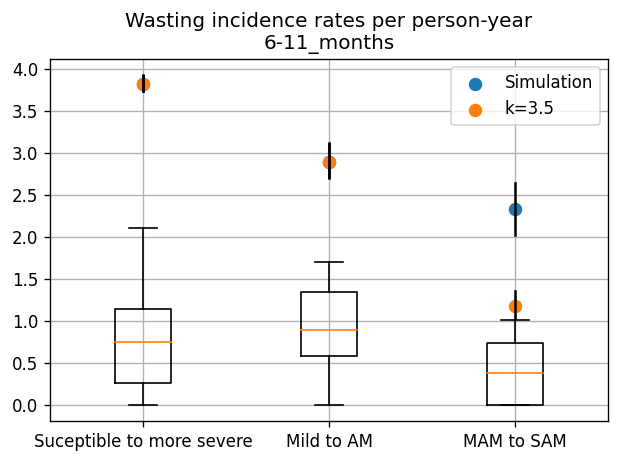

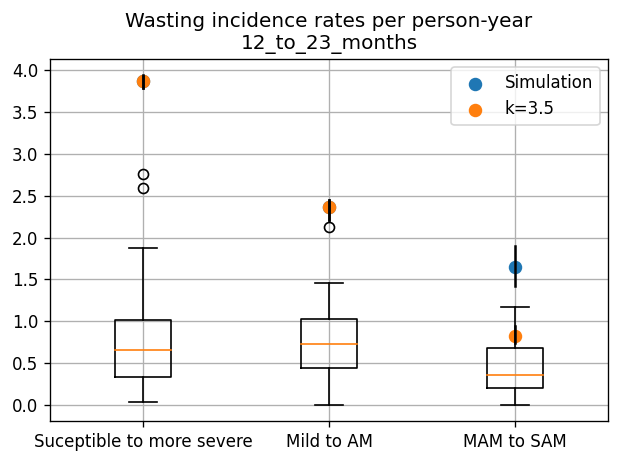

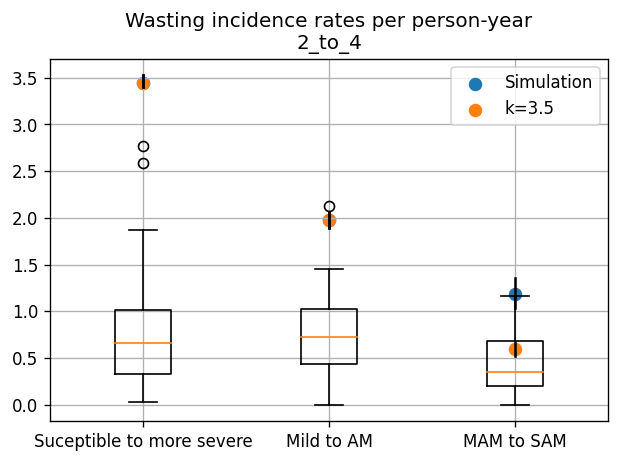

In [28]:
plot_incidence_rates('6 to 12 months', '6-11_months')
plot_incidence_rates('1 to 4 years', '12_to_23_months')
plot_incidence_rates('1 to 4 years', '2_to_4')

In [37]:
def plot_remission_rates(ki_age, sim_age):
    p = ki.loc[ki.age_group==ki_age]
    plt.figure(dpi=120)
    plt.boxplot([p.r_severe_all.dropna()*365,p.r_moderate_all.dropna()*365,p.r_mild_non*365])
    plt.xticks([1,2,3],['SAM to less severe','MAM to less severe','Mild to Susceptible'])
    plt.title(f'Wasting remission rates per person-year\n{sim_age}')

    s = sim.loc[(sim.age==sim_age)&(sim.sam_k=='baseline')]

    sinks = [
             'moderate_acute_malnutrition_to_mild_child_wasting_event_count',
             'mild_child_wasting_to_susceptible_to_child_wasting_event_count']

    for i in [0,1]:

        plt.plot([i+2.2,i+2.2],[s.loc[(s.sink_state==sinks[i])]['value','2.5%'],
                       s.loc[(s.sink_state==sinks[i])]['value','97.5%']],
                color='black')
        if i ==0:
            plt.scatter(i+2.2,s.loc[(s.sink_state==sinks[i])]['value','mean'],
                   s=50, color='tab:blue',label='Simulation')
        else:
            plt.scatter(i+2.2,s.loc[(s.sink_state==sinks[i])]['value','mean'],
                   s=50, color='tab:blue')

    plt.plot([1.2,1.2],[s.loc[(s.sink_state=='severe_acute_malnutrition_to_mild_child_wasting_event_count')]['value','2.5%'],
                   s.loc[(s.sink_state=='severe_acute_malnutrition_to_mild_child_wasting_event_count')]['value','97.5%']],
            color='black')
    plt.scatter(1.2,s.loc[(s.sink_state=='severe_acute_malnutrition_to_mild_child_wasting_event_count')]['value','mean'],
               s=50, color='tab:blue',label='Simulation treated (to mild)',marker='+')

    plt.plot([1.3,1.3],[s.loc[(s.sink_state=='severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count')]['value','2.5%'],
                   s.loc[(s.sink_state=='severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count')]['value','97.5%']],
            color='black')
    plt.scatter(1.3,s.loc[(s.sink_state=='severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count')]['value','mean'],
               s=50, color='tab:blue',label='Simulation untreated (to MAM)',
               marker='*')


    s = sim.loc[(sim.age==sim_age)&(sim.sam_k=='alternative')]

    sinks = [
             'moderate_acute_malnutrition_to_mild_child_wasting_event_count',
             'mild_child_wasting_to_susceptible_to_child_wasting_event_count']

    for i in [0,1]:

        plt.plot([i+2.2,i+2.2],[s.loc[(s.sink_state==sinks[i])]['value','2.5%'],
                       s.loc[(s.sink_state==sinks[i])]['value','97.5%']],
                color='black')
        if i ==0:
            plt.scatter(i+2.2,s.loc[(s.sink_state==sinks[i])]['value','mean'],
                   s=50, color='tab:orange',label='Simulation')
        else:
            plt.scatter(i+2.2,s.loc[(s.sink_state==sinks[i])]['value','mean'],
                   s=50, color='tab:orange')

    plt.plot([1.2,1.2],[s.loc[(s.sink_state=='severe_acute_malnutrition_to_mild_child_wasting_event_count')]['value','2.5%'],
                   s.loc[(s.sink_state=='severe_acute_malnutrition_to_mild_child_wasting_event_count')]['value','97.5%']],
            color='black')
    plt.scatter(1.2,s.loc[(s.sink_state=='severe_acute_malnutrition_to_mild_child_wasting_event_count')]['value','mean'],
               s=50, color='tab:orange',label='Simulation treated (to mild)',marker='+')

    plt.plot([1.3,1.3],[s.loc[(s.sink_state=='severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count')]['value','2.5%'],
                   s.loc[(s.sink_state=='severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count')]['value','97.5%']],
            color='black')
    plt.scatter(1.3,s.loc[(s.sink_state=='severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count')]['value','mean'],
               s=50, color='tab:orange',label='Simulation untreated (to MAM)',
               marker='*')

    plt.grid()
    plt.legend(bbox_to_anchor=[1,1])

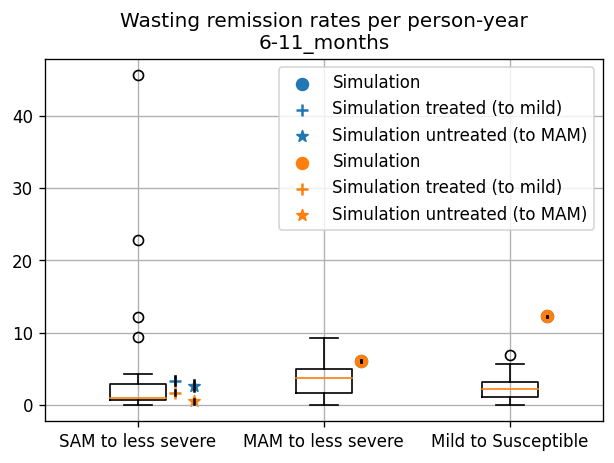

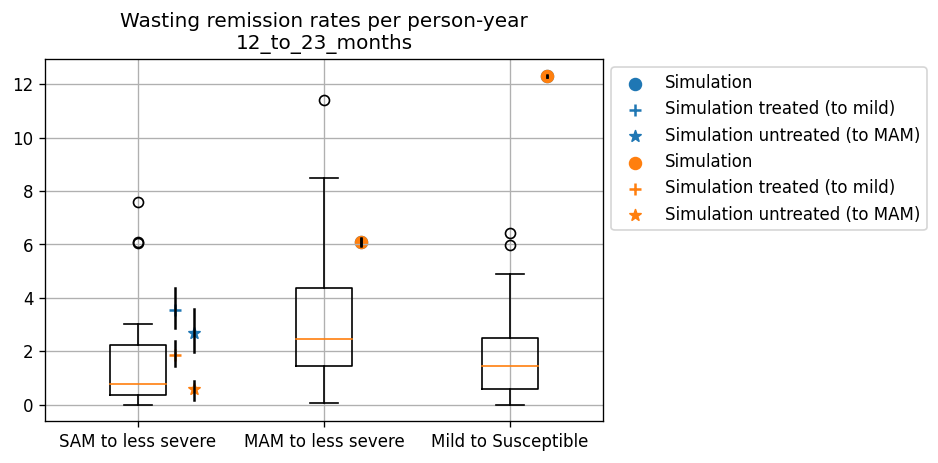

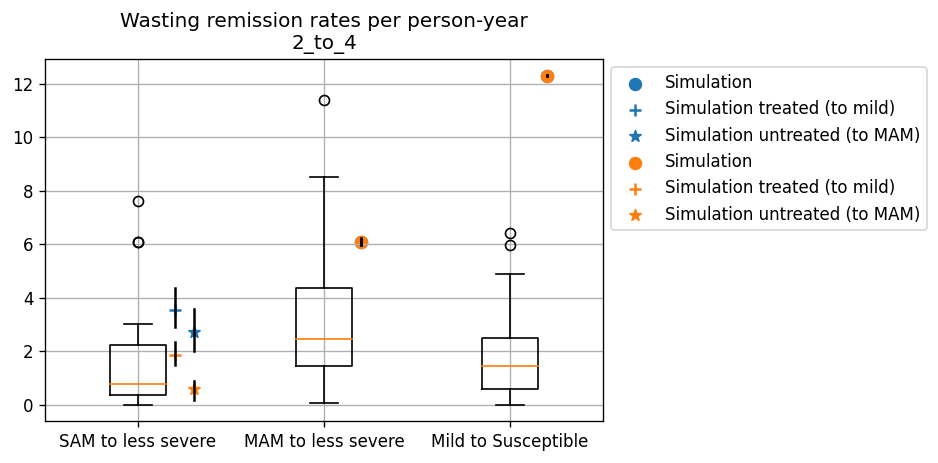

In [38]:
plot_remission_rates('6 to 12 months', '6-11_months')
plot_remission_rates('1 to 4 years', '12_to_23_months')
plot_remission_rates('1 to 4 years', '2_to_4')